## Day 4 - Python for Data Analysis 

### Non parametric modelling
Example: Travel time - Bluetooth detectors - identifying bimodal / multimodal distribution of times or speeds.

In [1]:
url = 'http://bit.ly/PythonCharmers_367_TravelTimes2'
from urllib.request import urlretrieve
urlretrieve(url,'TravelTimes2.zip')

URLError: <urlopen error unknown url type: http_proxy=http>

In [ ]:
#import requests
#response=request.get(url, proxies=proxies)
#with open('myfile.zip', mode='wb') as file:
#    file.write(response.raw)

In [4]:
import pandas as pd
travel_times = pd.read_csv('T:/Python/TravelTimes2.zip')
travel_times

,ORIGIN_SITE,DEST_SITE,MAC_ADDRESS,ORIGIN_TIME,TRAVEL_SECONDS
0,1764,1018,00233D2E6A08,1/10/2017 12:09:44 AM,723
1,1764,1018,94B2CC061424,1/10/2017 12:27:02 AM,546
2,1764,1018,94B2CC25CCC5,1/10/2017 12:38:54 AM,4070
3,1764,1018,00213E752004,1/10/2017 1:05:17 AM,565
4,1764,1018,6C2F2C8DD7CD,1/10/2017 1:05:22 AM,560
5,1764,1018,022B30303149,1/10/2017 2:08:15 AM,410
6,1764,1018,001673083A71,1/10/2017 2:12:37 AM,1349
7,1764,1018,001EB23379E1,1/10/2017 3:20:43 AM,357
8,1764,1018,0016732483E9,1/10/2017 4:42:05 AM,430
9,1764,1018,00233D505801,1/10/2017 5:04:32 AM,602


In [5]:
type(travel_times)

pandas.core.frame.DataFrame

In [6]:
travel_times['TIME'] = pd.to_datetime(travel_times['ORIGIN_TIME'])  #convert seriess object to times for timeseries

In [7]:
travel_times #wrong fortmat

,ORIGIN_SITE,DEST_SITE,MAC_ADDRESS,ORIGIN_TIME,TRAVEL_SECONDS,TIME
0,1764,1018,00233D2E6A08,1/10/2017 12:09:44 AM,723,2017-01-10 00:09:44
1,1764,1018,94B2CC061424,1/10/2017 12:27:02 AM,546,2017-01-10 00:27:02
2,1764,1018,94B2CC25CCC5,1/10/2017 12:38:54 AM,4070,2017-01-10 00:38:54
3,1764,1018,00213E752004,1/10/2017 1:05:17 AM,565,2017-01-10 01:05:17
4,1764,1018,6C2F2C8DD7CD,1/10/2017 1:05:22 AM,560,2017-01-10 01:05:22
5,1764,1018,022B30303149,1/10/2017 2:08:15 AM,410,2017-01-10 02:08:15
6,1764,1018,001673083A71,1/10/2017 2:12:37 AM,1349,2017-01-10 02:12:37
7,1764,1018,001EB23379E1,1/10/2017 3:20:43 AM,357,2017-01-10 03:20:43
8,1764,1018,0016732483E9,1/10/2017 4:42:05 AM,430,2017-01-10 04:42:05
9,1764,1018,00233D505801,1/10/2017 5:04:32 AM,602,2017-01-10 05:04:32


In [15]:
travel_times['TIME'] = pd.to_datetime(travel_times['ORIGIN_TIME'], format='%d/%m/%Y %I:%M:%S %p')  #convert seriess object to times for timeseries

In [17]:
travel_times

,ORIGIN_SITE,DEST_SITE,MAC_ADDRESS,ORIGIN_TIME,TRAVEL_SECONDS,TIME
0,1764,1018,00233D2E6A08,1/10/2017 12:09:44 AM,723,2017-10-01 00:09:44
1,1764,1018,94B2CC061424,1/10/2017 12:27:02 AM,546,2017-10-01 00:27:02
2,1764,1018,94B2CC25CCC5,1/10/2017 12:38:54 AM,4070,2017-10-01 00:38:54
3,1764,1018,00213E752004,1/10/2017 1:05:17 AM,565,2017-10-01 01:05:17
4,1764,1018,6C2F2C8DD7CD,1/10/2017 1:05:22 AM,560,2017-10-01 01:05:22
5,1764,1018,022B30303149,1/10/2017 2:08:15 AM,410,2017-10-01 02:08:15
6,1764,1018,001673083A71,1/10/2017 2:12:37 AM,1349,2017-10-01 02:12:37
7,1764,1018,001EB23379E1,1/10/2017 3:20:43 AM,357,2017-10-01 03:20:43
8,1764,1018,0016732483E9,1/10/2017 4:42:05 AM,430,2017-10-01 04:42:05
9,1764,1018,00233D505801,1/10/2017 5:04:32 AM,602,2017-10-01 05:04:32


In [18]:
travel_times.dtypes

ORIGIN_SITE                int64
DEST_SITE                  int64
MAC_ADDRESS               object
ORIGIN_TIME               object
TRAVEL_SECONDS             int64
TIME              datetime64[ns]
dtype: object

In [19]:
travel_times['Hour'] = travel_times['TIME'].dt.hour

In [22]:
travel_times[:3]

,ORIGIN_SITE,DEST_SITE,MAC_ADDRESS,ORIGIN_TIME,TRAVEL_SECONDS,TIME,Hour
0,1764,1018,00233D2E6A08,1/10/2017 12:09:44 AM,723,2017-10-01 00:09:44,0
1,1764,1018,94B2CC061424,1/10/2017 12:27:02 AM,546,2017-10-01 00:27:02,0
2,1764,1018,94B2CC25CCC5,1/10/2017 12:38:54 AM,4070,2017-10-01 00:38:54,0


In [27]:
distance_km = 7.0

In [28]:
travel_times['SPEED'] = distance_km/ (travel_times['TRAVEL_SECONDS'] / 60**2)

In [29]:
travel_times[:3]

,ORIGIN_SITE,DEST_SITE,MAC_ADDRESS,ORIGIN_TIME,TRAVEL_SECONDS,TIME,Hour,SPEED
0,1764,1018,00233D2E6A08,1/10/2017 12:09:44 AM,723,2017-10-01 00:09:44,0,34.854772
1,1764,1018,94B2CC061424,1/10/2017 12:27:02 AM,546,2017-10-01 00:27:02,0,46.153846
2,1764,1018,94B2CC25CCC5,1/10/2017 12:38:54 AM,4070,2017-10-01 00:38:54,0,6.191646


In [30]:
%matplotlib inline

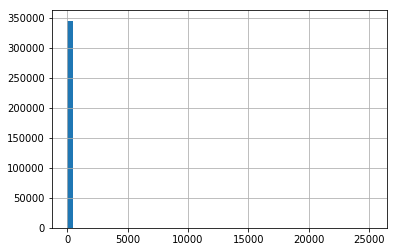

In [43]:
travel_times['SPEED'].hist(bins=50)

## Removing outliers

In [40]:
#chboekys inequalites to remove outliers???
travel_times_clean = travel_times[travel_times['SPEED']<150]

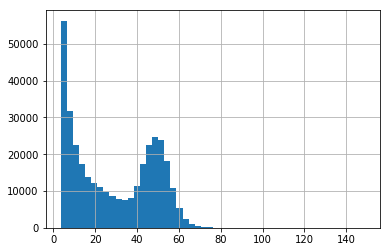

In [41]:
travel_times_clean['SPEED'].hist(bins=50)

In [48]:
criterion2 = travel_times_clean['Hour'] == 12
subset = travel_times_clean[criterion2]

In [49]:
subset

,ORIGIN_SITE,DEST_SITE,MAC_ADDRESS,ORIGIN_TIME,TRAVEL_SECONDS,TIME,Hour,SPEED
135,1764,1018,00267E76BF60,1/10/2017 12:00:11 PM,578,2017-10-01 12:00:11,12,43.598616
136,1764,1018,0008E0503B68,1/10/2017 12:01:14 PM,6287,2017-10-01 12:01:14,12,4.008271
137,1764,1018,9C8D7CF8538C,1/10/2017 12:09:32 PM,4387,2017-10-01 12:09:32,12,5.744244
138,1764,1018,9C8D7C49E404,1/10/2017 12:10:20 PM,553,2017-10-01 12:10:20,12,45.569620
139,1764,1018,0016731F58AC,1/10/2017 12:13:02 PM,6212,2017-10-01 12:13:02,12,4.056665
140,1764,1018,00267E6A50E3,1/10/2017 12:13:44 PM,503,2017-10-01 12:13:44,12,50.099404
141,1764,1018,0008C64375D6,1/10/2017 12:14:00 PM,536,2017-10-01 12:14:00,12,47.014925
142,1764,1018,00083C17A63E,1/10/2017 12:21:05 PM,508,2017-10-01 12:21:05,12,49.606299
143,1764,1018,00102BE881F0,1/10/2017 12:21:36 PM,1271,2017-10-01 12:21:36,12,19.826908
144,1764,1018,0016732483E9,1/10/2017 12:32:42 PM,1870,2017-10-01 12:32:42,12,13.475936


### Nonparametirc modelling

In [50]:
from scipy.stats import gaussian_kde #kernel denisty estimator

In [51]:
model = gaussian_kde(travel_times_clean['SPEED'].values)  #expects numpy array

In [53]:
import numpy as np
model.integrate_box_1d(100, np.inf)   #what is the probabilty under th emodel that the average speed is over 100 km/hour

0.0005880748894836064

In [57]:
model.integrate_box_1d(0, 40) #what is the probality under the model that the average speed is less than 40km/hour?

0.6155377062519874

In [58]:
model.integrate_box_1d?  ##andrew gallmen - all datasets are small

### Estimating confidence intervals "Bootstrap" - bradely Efron

#### Example: what is a 95% confidence interval for the median speed?
Based on resamples ( with replacement)from the original data

In [60]:
speeds = travel_times_clean['SPEED']
sample = np.random.choice(speeds, size=len(speeds))

In [63]:
medians=[]
for i in range(1000):
    sample = np.random.choice(speeds,size=len(speeds))
    medians.append(np.median(sample))

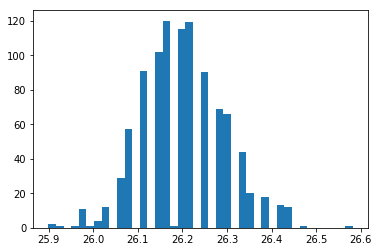

In [64]:
import matplotlib.pyplot as plt
plt.hist(medians, bins =40);

In [65]:
np.quantile(medians, [0.025, 0.975])

array([26.03305785, 26.41509434])

### We are 95% confident that the median speed is between 26.03 and 26.39

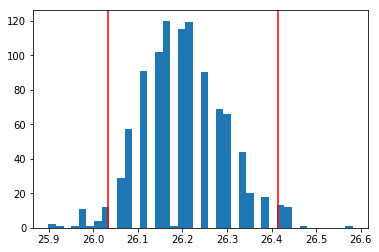

In [71]:
plt.hist(medians, bins =40)
plt.axvline(x=min(np.quantile(medians, [0.025, 0.975])), color='red')
plt.axvline(x=max(np.quantile(medians, [0.025, 0.975])), color='red')

### Optimisation to find the modes (minima/maxima)

In [75]:
from scipy.optimize import minimize #use inverst to find maximum

In [77]:
x = np.linspace(0, 150, num=1001)

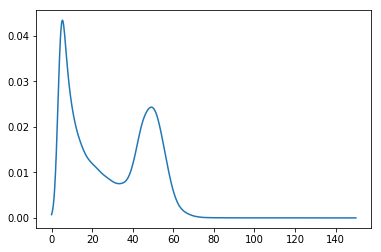

In [78]:
plt.plot(x,model.pdf(x)) #probability density function

In [79]:
def neg_pdf(x):
    return -1 * model.pdf(x)

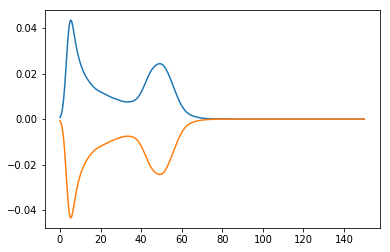

In [80]:
plt.plot(x,model.pdf(x))
plt.plot(x,neg_pdf(x))#probability density function

## What speeds causes the neg_pdf function to have (local) minima?

In [81]:
minimize?

In [85]:
troughs = []
for x0 in np.linspace(0,100, num=101):
    result = minimize(neg_pdf,x0)
    troughs.append(result['x'])

In [84]:
troughs

[array([5.3666013]),
 array([5.36718242]),
 array([5.36657891]),
 array([5.36656773]),
 array([49.16515547]),
 array([49.19538466]),
 array([49.17019204]),
 array([5.36672137]),
 array([80.]),
 array([90.]),
 array([100.])]

In [88]:
troughs_new = []
for x0 in np.linspace(0,100, num=101):
    result = minimize(neg_pdf,x0)
    if result < 0.01:
        troughs_new.append(result['x'])

TypeError: '<' not supported between instances of 'OptimizeResult' and 'float'

In [93]:
troughs_new = []
for i in troughs:
    if i < 0.01:
        troughs_new.append = i
        

In [94]:
t = np.array(troughs).flatten()

In [95]:
t

array([  5.3666013 ,   5.36663317,   5.36681481,   5.36690244,
         5.36657103,   5.3660761 ,   5.3669115 ,   5.36667546,
         5.36660122,   5.36766686,   5.36718242,   5.36659987,
         5.36663696,   5.36626603,   5.36634397,   5.36657679,
         5.36652532,   5.36653425,   5.3665353 ,   5.36670221,
         5.36657891,   5.36669225,   5.3665841 ,   5.36656987,
         5.36695024,   5.3667023 ,   5.36701723,   5.36702945,
         5.36676239,   5.36656706,   5.36656773,   5.36658913,
         5.36697865,   5.3673601 ,  49.16760224,  49.17222262,
        49.16776129,  49.17034534,  49.1692257 ,  49.16466412,
        49.16515547,  49.1708483 ,  49.17616663,  49.17201532,
        49.16980035,  49.17155956,  49.17108717,  49.1716165 ,
        49.16819191,  49.17342342,  49.19538466,  49.17815209,
        49.18578115,  49.18191883,  49.17381308,  49.17031652,
        49.17121516,  49.16670576,  49.1592113 ,  49.17090503,
        49.17019204,  49.17215728,  49.15457926,  49.17

In [98]:
criterion2 = model.pdf(t) < 0.01

In [100]:
troughts_filtered = t[~criterion2]

### Clustering

In [111]:
from sklearn.cluster import MeanShift

In [112]:
cluster_model = MeanShift(bandwidth=1)

In [108]:
X = troughts_filtered.reshape(-1,1)
X[:3]

array([[5.3666013 ],
       [5.36663317],
       [5.36681481]])

In [113]:
cluster_model.fit(X)

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [117]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [118]:
cluster_model.cluster_centers_

array([[ 5.36670045],
       [49.17144515]])

### Result: two peak of speed at 5.4km/hour and 49.2km/hour

In [131]:
def peak_from_time_day(travel_times, timeIn = 8, speed = 150):
    
    '''Automatically identifies the peak times travel time with input data
    Useses time parameter and speed data to clean
    Defines function timeseries to approximate a functions
    '''
    travel_times_clean = travel_times[travel_times['SPEED']<speed]
    travel_times_clean = travel_times[travel_times['TIME']== timeIn]
    x = np.linspace(0, 150, num=1001)
    
    troughs = []
    for x0 in np.linspace(0,100, num=101):
        result = minimize(neg_pdf,x0)
        troughs.append(result['x'])
        
    t = np.array(troughs).flatten()
    
    #Clusters
    X = troughts_filtered.reshape(-1,1)
    cluster_model = MeanShift(bandwidth=1)
    cluster_model.fit(X)
    cluster_model.labels_
    cluster_model.cluster_centers_
    s = cluster_model.cluster_centers_
    return s

In [146]:
def peak_from_time_day(timeIn):
    
    '''Automatically identifies the peak times travel time with input data
    Useses time parameter and speed data to clean
    Defines function timeseries to approximate a functions
    '''
    
    criterion = travel_times_clean['Hour'] == timeIn
    subset = travel_times_clean[criterion]
    speeds = subset['SPEED'].values
    model = gaussian_kde(speeds)


    ### Nonparametirc modelling
    #model = gaussian_kde(travel_times_clean['SPEED'].values)  #expects numpy array
    model.integrate_box_1d(100, np.inf)   #what is the probabilty under th emodel that the average speed is over 100 km/hour
    model.integrate_box_1d(0, 40) #what is the probality under the model that the average speed is less than 40km/hour?

    ### Estimating confidence intervals "Bootstrap" - bradely Efron

    speeds = travel_times_clean['SPEED']
    sample = np.random.choice(speeds, size=len(speeds))

    medians=[]
    for i in range(1000):
        sample = np.random.choice(speeds,size=len(speeds))
        medians.append(np.median(sample))


    plt.hist(medians, bins =40);
    np.quantile(medians, [0.025, 0.975])

    ### We are 95% confident that the median speed is between 26.03 and 26.39

    plt.hist(medians, bins =40)
    plt.axvline(x=min(np.quantile(medians, [0.025, 0.975])), color='red')
    plt.axvline(x=max(np.quantile(medians, [0.025, 0.975])), color='red')

    ### Optimisation to find the modes (minima/maxima)
    x = np.linspace(0, 150, num=1001)
    plt.plot(x,model.pdf(x)) #probability density function
    def neg_pdf(x):
        return -1 * model.pdf(x)

    plt.plot(x,model.pdf(x))
    plt.plot(x,neg_pdf(x))#probability density function

    ## What speeds causes the neg_pdf function to have (local) minima?
    troughs = []
    for x0 in np.linspace(0,100, num=101):
        result = minimize(neg_pdf,x0)
        troughs.append(result['x'])

    t = np.array(troughs).flatten()
    criterion2 = model.pdf(t) < 0.01
    troughts_filtered = t[~criterion2]

    ### Clustering
    cluster_model = MeanShift(bandwidth=1)
    X = troughts_filtered.reshape(-1,1)
    cluster_model.fit(X)
    cluster_model.labels_
    cluster_model.cluster_centers_

    return cluster_model.cluster_centers_

array([[52.55680511],
       [ 7.33185945],
       [24.71817878],
       [19.77127162]])

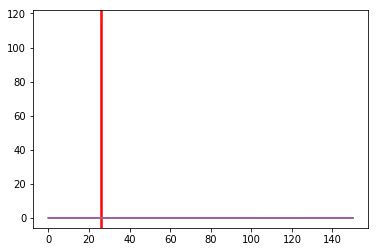

In [148]:
peak_from_time_day(20)

### Casualty Data

In [149]:
import pandas as pd

In [150]:
filename = 'T:/MI_training/rqC29537_Queensland_casualty.csv'

In [151]:
casualty = pd.read_csv(filename,skiprows=3)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
casualty.columns

Index(['CRASH_REF_NUMBER', 'CASUALTY_UNIT', 'CASUALTY_OCCUPANT_NUMBER',
       'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR',
       'CRASH_TYPE', 'CRASH_NATURE', 'CRASH_TRANSPORT_REGION',
       'CRASH_ROADS_REGION', 'CRASH_SUBURB', 'CRASH_LOCAL_GOVERNMENT_AREA',
       'CRASH_POLICE_DISTRICT', 'CRASH_POLICE_REGION',
       'CRASH_ABS_REMOTENESS_CLASSIFICATION', 'CRASH_ROADSECTION_AUTHORITY',
       'CRASH_ROADWAY_FEATURE', 'CRASH_TRAFFIC_CONTROL', 'CRASH_SPEED_LIMIT',
       'CRASH_DCA_CODE', 'CRASH_DCA_DESCRIPTION', 'CRASH_DCA_GROUP_CODE',
       'CRASH_DCA_GROUP_DESCRIPTION', 'CASUALTY_SEVERITY',
       'CASUALTY_AGE_GROUP', 'CASUALTY_AGE_GROUP_DETAIL', 'CASUALTY_GENDER',
       'CASUALTY_ROAD_USER_GROUP', 'CASUALTY_ROAD_USER_TYPE',
       'CASUALTY_UNIT_GROUP', 'CASUALTY_UNIT_TYPE', 'CASUALTY_RESTRAINT_USE',
       'CASUALTY_HELMET_USE', 'CASUALTY_FACTOR_UNRESTRAINED',
       'CRASH_FACTOR_UNRESTRAINED', 'CRASH_FACTOR_ALCOHOLDRUG_RELATED',
       'CRASH_FACTOR_ALC

In [160]:
casualty['CRASH_SPEED_LIMIT'].value_counts()

60 km/h           82437
100 - 110 km/h    31069
0 - 50 km/h       28400
80 - 90 km/h      17692
70 km/h           11405
Unknown               4
Name: CRASH_SPEED_LIMIT, dtype: int64

In [154]:
len(casualty)

171007

In [191]:
features = [ 'SPEED_LIMIT', 'CRASH_NATURE', 'CASUALTY_RESTRAINT_USE','CRASH_FACTOR_DRINK_DR']

In [157]:
target = 'CASUALTY_SEVERITY'

In [159]:
casualty[features]

,CRASH_SPEED_LIMIT,CRASH_NATURE,CASUALTY_RESTRAINT_USE,CRASH_FACTOR_DRINK_DR
0,60 km/h,Fall from vehicle,Not applicable,0
1,60 km/h,Hit pedestrian,Not applicable,0
2,70 km/h,Angle,Not applicable,0
3,60 km/h,Angle,Restrained,0
4,60 km/h,Angle,Restrained,0
5,60 km/h,Angle,Not determined,0
6,60 km/h,Angle,Not determined,0
7,60 km/h,Angle,Not applicable,0
8,60 km/h,Angle,Restrained,0
9,60 km/h,Angle,Restrained,0


In [163]:
casualty['CRASH_SPEED_LIMIT'].str.extract(r'.*(\d\d+) km/h')

,0
0,60
1,60
2,70
3,60
4,60
5,60
6,60
7,60
8,60
9,60


In [175]:
casualty['SPEED_LIMIT']=casualty['CRASH_SPEED_LIMIT'].str.extract(r'.*?(\d\d+) km/h')   #read pdf files regular expressions and how to regex

In [178]:
casualty[features][300:400]

,SPEED_LIMIT,CRASH_NATURE,CASUALTY_RESTRAINT_USE,CRASH_FACTOR_DRINK_DR
300,70,Rear-end,Restrained,0
301,60,Rear-end,Restrained,0
302,60,Rear-end,Restrained,0
303,60,Rear-end,Restrained,0
304,60,Rear-end,Restrained,0
305,70,Angle,Restrained,0
306,70,Angle,Restrained,0
307,50,Angle,Restrained,0
308,60,Rear-end,Restrained,0
309,60,Angle,Not determined,0


### one-hot encoding `pd.get_dummies()` 
used to encode category features

In [187]:
cat_features= ['CRASH_NATURE', 'CASUALTY_RESTRAINT_USE']
training_data=pd.get_dummies(casualty[features], columns=cat_features)#.dropna()

In [188]:
training_data['SPEED_LIMIT']=training_data['SPEED_LIMIT'].astype(float)

In [189]:
X = training_data.values

In [190]:
y = casualty[target].astype('category').cat.codes

In [194]:
is_dodgy = training_data.isna().any(axis=1)

In [196]:
is_dodgy[:3]

0    False
1    False
2    False
dtype: bool

In [197]:
len(X), len(y)

(171007, 171007)

In [198]:
X = X[~is_dodgy]
y = y[~is_dodgy]

In [199]:
X.shape, y.shape

((171003, 17), (171003,))

In [200]:
from sklearn.linear_model import LogisticRegression #NB this is a classification algorithm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
model = LogisticRegression()

In [203]:
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [205]:
model.predict(X)

array([1, 1, 1, ..., 2, 2, 2], dtype=int8)

In [210]:
predictions = model.predict(X) 

In [211]:
np.mean(predictions== y)   #evaluate the accuracy of the "predictions"

0.5063069068963703

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [212]:
confusion_matrix(y,predictions)

array([[    0,  2333,   273,     0],
       [    0, 40017, 25325,     0],
       [    0, 26184, 46563,     0],
       [    0,  9191, 21117,     0]], dtype=int64)

In [214]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2606
           1       0.51      0.61      0.56     65342
           2       0.50      0.64      0.56     72747
           3       0.00      0.00      0.00     30308

   micro avg       0.51      0.51      0.51    171003
   macro avg       0.25      0.31      0.28    171003
weighted avg       0.41      0.51      0.45    171003



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
from sklearn.linear_model import SGDClassifier #NB this is a classification algorithm

In [216]:
model = SGDClassifier()

model.fit(X,y)

model.predict(X)

predictions = model.predict(X) 

np.mean(predictions== y)   #evaluate the accuracy of the "predictions"

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(y,predictions)

print(classification_report(y,predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2606
           1       0.61      0.07      0.12     65342
           2       0.43      0.98      0.60     72747
           3       0.00      0.00      0.00     30308

   micro avg       0.44      0.44      0.44    171003
   macro avg       0.26      0.26      0.18    171003
weighted avg       0.42      0.44      0.30    171003



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [217]:
from sklearn.ensemble import RandomForestClassifier #NB this is a classification algorithm

In [218]:
model = RandomForestClassifier()

model.fit(X,y)

model.predict(X)

predictions = model.predict(X) 

np.mean(predictions== y)   #evaluate the accuracy of the "predictions"

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(y,predictions)

print(classification_report(y,predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.42      0.01      0.03      2606
           1       0.51      0.66      0.57     65342
           2       0.51      0.61      0.55     72747
           3       0.46      0.00      0.01     30308

   micro avg       0.51      0.51      0.51    171003
   macro avg       0.48      0.32      0.29    171003
weighted avg       0.50      0.51      0.46    171003



In [219]:
from sklearn.neural_network import MLPClassifier #NB this is a classification algorithm

In [221]:
model = MLPClassifier()

model.fit(X,y)

model.predict(X)

predictions = model.predict(X) 

np.mean(predictions== y)   #evaluate the accuracy of the "predictions"

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(y,predictions)

print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.44      0.00      0.00      2606
           1       0.51      0.65      0.57     65342
           2       0.51      0.61      0.55     72747
           3       0.00      0.00      0.00     30308

   micro avg       0.51      0.51      0.51    171003
   macro avg       0.37      0.32      0.28    171003
weighted avg       0.42      0.51      0.45    171003



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Example 2: truck classifications. 
#### Weigh in mootion datasets.

In [224]:
Weight_Trucks = pd.read_csv('T:/Python/PBS_Trucks_Classified.zip')

In [231]:
Weight_Trucks.columns#Exercis

Index(['RecordID', 'SITE_ID', 'DESCRIPTION', 'DATA_DATE', 'SITE_STREAM',
       'CONFIG', 'SPEED', 'GVM', 'SPACING 01', 'SPACING 02', 'SPACING 03',
       'SPACING 04', 'SPACING 05', 'SPACING 06', 'SPACING 07', 'SPACING 08',
       'SPACING 09', 'SPACING 10', 'SPACING 11', 'SPACING 12', 'SPACING 13',
       'SPACING 14', 'SPACING 15', 'SPACING 16', 'SPACING 17', 'SPACING 18',
       'SPACING 19', 'SPACING 20', 'SPACING 21', 'length',
       'PBS Cat by length'],
      dtype='object')

In [228]:
Weight_Trucks.

NameError: name 'NaN' is not defined

In [229]:
Weight_Trucks['SPACING 02'] = Weight_Trucks['SPACING 02'].replace(np.nan, 0)

In [232]:
RemoveColumns = ['SPACING 01', 'SPACING 02', 'SPACING 03',
       'SPACING 04', 'SPACING 05', 'SPACING 06', 'SPACING 07', 'SPACING 08',
       'SPACING 09', 'SPACING 10', 'SPACING 11', 'SPACING 12', 'SPACING 13',
       'SPACING 14', 'SPACING 15', 'SPACING 16', 'SPACING 17', 'SPACING 18',
       'SPACING 19', 'SPACING 20', 'SPACING 21']

In [233]:
Weight_Trucks[RemoveColumns] = Weight_Trucks[RemoveColumns].replace(np.nan, 0)

In [235]:
Weight_Trucks['PBS Cat by length'] = Weight_Trucks['PBS Cat by length'].replace('Assessed Non-PBS', ' Non-PBS')

In [237]:
Weight_Trucks['PBS Cat by length'].value_counts()

Non PBS                    1549977
 Non-PBS                    270386
PBS 1                        36987
PBS 2A                       22767
PBS 3A                        6684
PBS 2B                        4990
PBS 2A (Variant 1 or 2)         44
PBS 2A (Variant 3)              19
PBS 3B                           4
PBS 2B (Variant 1 or 2)          2
Name: PBS Cat by length, dtype: int64

In [246]:
Weight_Trucks_cat=Weight_Trucks['PBS Cat by length'] != 'PBS 2B (Variant 1 or 2)'

In [269]:
new =Weight_Trucks[~Weight_Trucks['PBS Cat by length'].str.contains('Variant 1 or 2')]

In [281]:
Weight_Trucks_cat_new['PBS Cat by length'].value_counts()

Non PBS    1549977
Non-PBS     270386
PBS 1        36987
PBS 2A       22767
PBS 3A        6684
PBS 2B        4990
Name: PBS Cat by length, dtype: int64

In [273]:
new =new[~new['PBS Cat by length'].str.contains('Variant 3')]

In [275]:
Weight_Trucks_cat_new = new

In [280]:
Weight_Trucks_cat_new['PBS Cat by length'] = Weight_Trucks_cat_new['PBS Cat by length'].replace(' Non-PBS', 'Non-PBS')

In [283]:
trucks_clean= Weight_Trucks_cat_new.iloc[:,8:-1] #from 8 to the last 1

In [285]:
trucks_clean.dtypes

SPACING 01    float64
SPACING 02    float64
SPACING 03    float64
SPACING 04    float64
SPACING 05    float64
SPACING 06    float64
SPACING 07    float64
SPACING 08    float64
SPACING 09    float64
SPACING 10    float64
SPACING 11    float64
SPACING 12    float64
SPACING 13    float64
SPACING 14    float64
SPACING 15    float64
SPACING 16    float64
SPACING 17    float64
SPACING 18    float64
SPACING 19    float64
SPACING 20    float64
SPACING 21    float64
length        float64
dtype: object

In [286]:
y= Weight_Trucks_cat_new['PBS Cat by length'].values

In [287]:
X = trucks_clean.values

In [288]:
X.shape, y.shape

((1891791, 22), (1891791,))

In [289]:
from sklearn.model_selection import train_test_split, cross_val_score

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [291]:
model = RandomForestClassifier()

In [292]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [293]:
predictions= model.predict(X_test)

In [294]:
accuracy_score(y_test,predictions)

0.9995538621582076

In [295]:
trucks_clean

,SPACING 01,SPACING 02,SPACING 03,SPACING 04,SPACING 05,SPACING 06,SPACING 07,SPACING 08,SPACING 09,SPACING 10,...,SPACING 13,SPACING 14,SPACING 15,SPACING 16,SPACING 17,SPACING 18,SPACING 19,SPACING 20,SPACING 21,length
0,3.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.21
1,3.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.22
2,3.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.23
3,3.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.24
4,3.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25
5,3.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26
6,3.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.27
7,3.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28
8,3.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29
9,3.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.30


In [296]:
confusion_matrix(y_test,predictions)

array([[387318,      0,      0,      0,      0,      0],
       [     0,  67840,     33,     25,      1,      5],
       [     0,     80,   9138,      2,      0,      0],
       [     0,     47,      4,   5542,      5,      0],
       [     0,      3,      0,      1,   1216,      0],
       [     0,      2,      0,      0,      3,   1683]], dtype=int64)

### Feature Selection
I recommend "permutation importance"  #to Identify noise.


### Email ed@pythoncharmers.com

In [297]:
pip install eli5 --set proxy_servers.http localhost:3128

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --set
